## Data Collection & Storage

In [50]:
# Data Handling & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.impute import SimpleImputer

# Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE 

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score

# Model Saving
import pickle
import joblib


ModuleNotFoundError: No module named 'imblearn'

In [ ]:


# Load dataset
df = pd.read_csv("responses.csv")  # Replace with actual filename

# Rename columns
df = df.rename(columns={
    "1️⃣ Age Group:": "Age Group",
    "2️⃣ Gender:": "Gender",
    "3️⃣ Current Education Level:": "Education Level",
    "4️⃣ On a scale of 1 to 5, how stressed do you feel about academics? (1 = Not Stressed, 5 = Extremely Stressed)  ": "Stress Level",
    "5️⃣ How many hours per day do you spend on academic work (assignments, studying, lectures, etc.)?  ": "Study Hours",
    "6️⃣ What are the biggest academic stressors for you? (Select all that apply)  ": "Stress Factors",
    "7️⃣ On average, how many hours of sleep do you get per night?  ": "Sleep Hours",
    "8️⃣ Do you engage in any of the following habits regularly? (Select all that apply)  ": "Habits",
    "9️⃣ How often do you feel overwhelmed by stress?  ": "Overwhelmed Frequency",
    "🔟 When feeling stressed or anxious, what helps you the most? (Select all that apply)  ": "Coping Mechanisms",
    "1️⃣1️⃣ Would you be interested in a WhatsApp chatbot that provides instant mental health tips?  ": "WhatsApp Chatbot Interest",
    "1️⃣2️⃣ Would you like to receive personalized mental health insights based on your responses?  ": "Personalized Insights Interest",
    "1️⃣3️⃣ What kind of support do you think would help improve student mental health? (Select all that apply)  ": "Support Preferences"
})

# Remove Timestamp column if present
if "Timestamp" in df.columns:
    df.drop(columns=["Timestamp"], inplace=True)

# Save cleaned dataset (optional)
df.to_csv("cleaned_survey_data.csv", index=False)

print("Column names cleaned successfully!")

Column names cleaned successfully!


In [ ]:


# Load dataset
df = pd.read_csv("cleaned_survey_data.csv")

# Check for missing values
print(df.isnull().sum())

# Fill numeric columns with mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill categorical columns with mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Encode categorical columns (example: One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Display basic info
df.info()
df.head()


Age Group                            0
Gender                               0
Education Level                      0
Stress Level                         0
Study Hours                          0
Stress Factors                       0
Sleep Hours                          0
Habits                               0
Overwhelmed Frequency                0
Coping Mechanisms                    0
WhatsApp Chatbot Interest            0
Personalized Insights Interest       0
Support Preferences                  0
Unnamed: 14                       1106
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 47 columns):
 #   Column                                                                                                Non-Null Count  Dtype
---  ------                                                                                                --------------  -----
 0   Age Group_19-21                                                        

,Age Group_19-21,Age Group_22-25,Age Group_26+,Gender_Male,Gender_Non-binary / Prefer not to say,Education Level_Postgraduate,Education Level_Undergraduate,Stress Level_2️⃣,Stress Level_3️⃣,Stress Level_4️⃣,...,Support Preferences_Mindfulness workshops & stress management programs,Support Preferences_More mental health awareness in schools/universities,Support Preferences_Online AI Chatbots for quick mental health advice,Support Preferences_Relaxation spaces in academic institutions,Unnamed: 14_It should be easy to access. And it should be in totally private,Unnamed: 14_Just a supportive environment all around would strengthen people's way of handling stres,Unnamed: 14_Ntg,Unnamed: 14_Relaxing team tasks for enjoy organised by university everyday (should be there),Unnamed: 14_nothing,Unnamed: 14_nothing
0,True,False,False,True,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,True,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,True,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,False,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
df.drop(columns=['Unnamed: 14'], inplace=True, errors='ignore')

In [ ]:


# Load dataset
df = pd.read_csv("cleaned_survey_data.csv")

# Drop empty/unnecessary columns
df.drop(columns=['Unnamed: 14'], inplace=True, errors='ignore')

# Fill numeric missing values with mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill categorical missing values with mode (most frequent)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Encode categorical features using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Display info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 41 columns):
 #   Column                                                                    Non-Null Count  Dtype
---  ------                                                                    --------------  -----
 0   Age Group_19-21                                                           1114 non-null   bool 
 1   Age Group_22-25                                                           1114 non-null   bool 
 2   Age Group_26+                                                             1114 non-null   bool 
 3   Gender_Male                                                               1114 non-null   bool 
 4   Gender_Non-binary / Prefer not to say                                     1114 non-null   bool 
 5   Education Level_Postgraduate                                              1114 non-null   bool 
 6   Education Level_Undergraduate                                             1114 n

In [ ]:


# Load the dataset (if not already loaded)
df = pd.read_csv("cleaned_survey_data.csv")  # Replace with your actual file

# Get basic statistics
df.describe()

,Age Group,Gender,Education Level,Stress Level,Study Hours,Stress Factors,Sleep Hours,Habits,Overwhelmed Frequency,Coping Mechanisms,WhatsApp Chatbot Interest,Personalized Insights Interest,Support Preferences,Unnamed: 14
count,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,8
unique,4,3,3,5,4,5,4,5,4,5,3,4,5,7
top,26+,Male,Undergraduate,3️⃣,Less than 2 hours,Maintaining Good Grades,Less than 4 hours,Healthy eating habits,Always (Every day),Taking short breaks or naps,"Maybe, I’m curious.",No,Relaxation spaces in academic institutions,.
freq,298,394,391,244,323,251,303,232,303,226,385,583,235,2


In [ ]:
print(df.dtypes)

Age Group                         object
Gender                            object
Education Level                   object
Stress Level                      object
Study Hours                       object
Stress Factors                    object
Sleep Hours                       object
Habits                            object
Overwhelmed Frequency             object
Coping Mechanisms                 object
WhatsApp Chatbot Interest         object
Personalized Insights Interest    object
Support Preferences               object
Unnamed: 14                       object
dtype: object


C:\Users\kapil\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


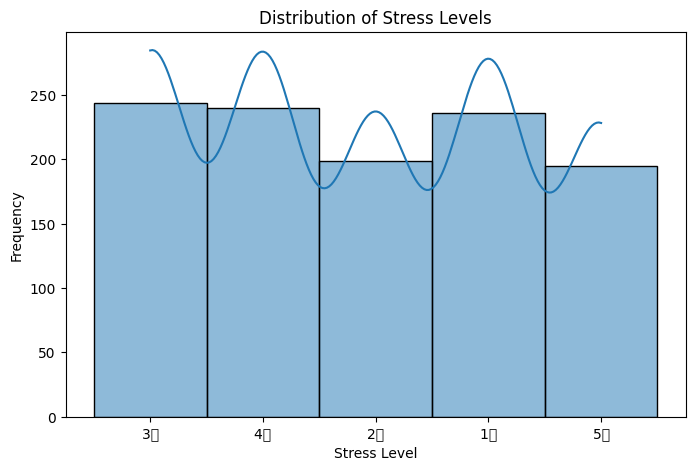

In [ ]:


plt.figure(figsize=(8,5))
sns.histplot(df["Stress Level"], bins=10, kde=True)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ["Age Group", "Gender", "Education Level", "Stress Factors", "Habits", "Coping Mechanisms", "Support Preferences"]

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding

print(df.head())  # Check transformed data

   Age Group  Gender  Education Level Stress Level        Study Hours  \
0          1       1                2          3️⃣          2-4 hours   
1          1       1                2          4️⃣          2-4 hours   
2          1       1                2          2️⃣          2-4 hours   
3          1       1                2          3️⃣  Less than 2 hours   
4          2       1                2          1️⃣          4-6 hours   

   Stress Factors Sleep Hours  Habits            Overwhelmed Frequency  \
0               2   6-8 hours       1  Sometimes (A few times a month)   
1               2   6-8 hours       1  Sometimes (A few times a month)   
2               1   6-8 hours       4            Rarely (Almost never)   
3               4   6-8 hours       1  Sometimes (A few times a month)   
4               0   4-6 hours       4            Rarely (Almost never)   

   Coping Mechanisms      WhatsApp Chatbot Interest  \
0                  2        Yes, I would love that!   
1     

In [ ]:
# Convert all columns to string type (to avoid unexpected errors)
df = df.astype(str)

# Find and remove rows that contain emojis or unwanted characters
df = df[~df.apply(lambda x: x.str.contains("[^\w\s.,-]", regex=True)).any(axis=1)]

# Convert back to appropriate data types
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values (if conversion failed for some rows)
df = df.dropna()

print(df.head())  # Check cleaned data

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kapil\AppData\Local\Temp\ipykernel_3956\2516291869.py:5: SyntaxWarning: invalid escape sequence '\w'
  df = df[~df.apply(lambda x: x.str.contains("[^\w\s.,-]", regex=True)).any(axis=1)]


Empty DataFrame
Columns: [Age Group, Gender, Education Level, Stress Level, Study Hours, Stress Factors, Sleep Hours, Habits, Overwhelmed Frequency, Coping Mechanisms, WhatsApp Chatbot Interest, Personalized Insights Interest, Support Preferences, Unnamed: 14]
Index: []


In [ ]:
# Check correlation of all features with 'Stress Level'
correlation = df.corr()['Stress Level'].sort_values(ascending=False)
print(correlation)

Age Group                        NaN
Gender                           NaN
Education Level                  NaN
Stress Level                     NaN
Study Hours                      NaN
Stress Factors                   NaN
Sleep Hours                      NaN
Habits                           NaN
Overwhelmed Frequency            NaN
Coping Mechanisms                NaN
WhatsApp Chatbot Interest        NaN
Personalized Insights Interest   NaN
Support Preferences              NaN
Unnamed: 14                      NaN
Name: Stress Level, dtype: float64


In [ ]:


# Load Data
df = pd.read_csv("cleaned_survey_data.csv")

# Convert Age Group into Numerical Bins
age_mapping = {"16-18": 1, "19-21": 2, "22-25": 3, "26+": 4}
df["Age Group"] = df["Age Group"].map(age_mapping)

# Convert Gender to Numeric
gender_mapping = {"Male": 0, "Female": 1, "Non-binary / Prefer not to say": 2}
df["Gender"] = df["Gender"].map(gender_mapping)

# Convert Education Level
df["Education Level"] = df["Education Level"].astype("category").cat.codes

# Convert Stress Level (Emoji to Number)
stress_mapping = {"1️⃣": 1, "2️⃣": 2, "3️⃣": 3, "4️⃣": 4, "5️⃣": 5}
df["Stress Level"] = df["Stress Level"].map(stress_mapping)

# Convert Study Hours into Numbers
study_hours_mapping = {
    "Less than 2 hours": 1, "2-4 hours": 2, "4-6 hours": 3, "More than 6 hours": 4
}
df["Study Hours"] = df["Study Hours"].map(study_hours_mapping)

# Convert Sleep Hours into Numbers
sleep_hours_mapping = {
    "Less than 4 hours": 1, "4-6 hours": 2, "6-8 hours": 3, "More than 8 hours": 4
}
df["Sleep Hours"] = df["Sleep Hours"].map(sleep_hours_mapping)

# Convert Overwhelmed Frequency into Ordinal Scale
overwhelmed_mapping = {
    "Rarely (Almost never)": 1,
    "Sometimes (A few times a month)": 2,
    "Often (Several times a week)": 3,
    "Always (Every day)": 4
}
df["Overwhelmed Frequency"] = df["Overwhelmed Frequency"].map(overwhelmed_mapping)

# Convert Multi-Select Columns into Binary Columns
multi_columns = ["Stress Factors", "Habits", "Coping Mechanisms", "Support Preferences"]

for col in multi_columns:
    df[col] = df[col].fillna("")  # Replace NaN with empty string
    df[col] = df[col].apply(lambda x: x.split(";"))  # Convert to List

mlb = MultiLabelBinarizer()
for col in multi_columns:
    mlb_result = pd.DataFrame(mlb.fit_transform(df[col]), columns=mlb.classes_)
    df = pd.concat([df, mlb_result], axis=1)
    df.drop(columns=[col], inplace=True)

# Convert Yes/No Columns
yes_no_columns = ["WhatsApp Chatbot Interest", "Personalized Insights Interest"]

for col in yes_no_columns:
    df[col] = df[col].map({
        "Yes, I would love that!": 1,
        "Maybe, I’m curious.": 0.5,
        "No, I don’t think I’d use it.": 0
    })

# Drop any unnamed columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

print("Data Cleaning Complete!")

Data Cleaning Complete!


In [ ]:


# Check for missing values
df.isnull().sum()

Age Group                                                  0
Gender                                                     0
Education Level                                            0
Stress Level                                               0
Study Hours                                                0
Sleep Hours                                                0
Overwhelmed Frequency                                      0
WhatsApp Chatbot Interest                                  0
Personalized Insights Interest                          1114
Assignments & Deadlines                                    0
Competitive Environment                                    0
Exams & Tests                                              0
Lack of Time Management                                    0
Maintaining Good Grades                                    0
Healthy eating habits                                      0
Listening to music/podcasts for relaxation                 0
Meditation or mindfulnes

In [ ]:


# Define imputation strategies
num_imputer = SimpleImputer(strategy="median")  # For numerical columns
cat_imputer = SimpleImputer(strategy="most_frequent")  # For categorical columns

# Identify numerical and categorical columns
num_cols = ["Stress Level", "Study Hours", "Sleep Hours"]  # Numerical columns
cat_cols = ["Age Group", "Gender", "Overwhelmed Frequency", "WhatsApp Chatbot Interest"]  # Categorical columns

# Apply imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])  
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])  

# Verify no missing values remain
print(df.isna().sum())

Age Group                                                  0
Gender                                                     0
Education Level                                            0
Stress Level                                               0
Study Hours                                                0
Sleep Hours                                                0
Overwhelmed Frequency                                      0
WhatsApp Chatbot Interest                                  0
Personalized Insights Interest                          1114
Assignments & Deadlines                                    0
Competitive Environment                                    0
Exams & Tests                                              0
Lack of Time Management                                    0
Maintaining Good Grades                                    0
Healthy eating habits                                      0
Listening to music/podcasts for relaxation                 0
Meditation or mindfulnes

In [ ]:
# Summary statistics
df.describe()

,Age Group,Gender,Education Level,Stress Level,Study Hours,Sleep Hours,Overwhelmed Frequency,WhatsApp Chatbot Interest,Personalized Insights Interest,Assignments & Deadlines,...,Exercising or engaging in a hobby,"Seeking professional help (counseling, therapy)",Taking short breaks or naps,Talking to a friend or family member,Using social media to distract myself,Easy access to counseling services,Mindfulness workshops & stress management programs,More mental health awareness in schools/universities,Online AI Chatbots for quick mental health advice,Relaxation spaces in academic institutions
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,0.0,1114.000000,...,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,2.546679,0.968582,1.034111,2.963196,2.415619,2.446140,2.541293,0.517504,NaN,0.186715,...,0.200180,0.201077,0.202873,0.202873,0.192998,0.196589,0.205566,0.206463,0.180431,0.210952
std,1.120772,0.821926,0.816884,1.393571,1.142407,1.122052,1.137691,0.404277,NaN,0.389857,...,0.400314,0.400986,0.402319,0.402319,0.394829,0.397597,0.404296,0.404949,0.384719,0.408167
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.250000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,0.500000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,1.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,4.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


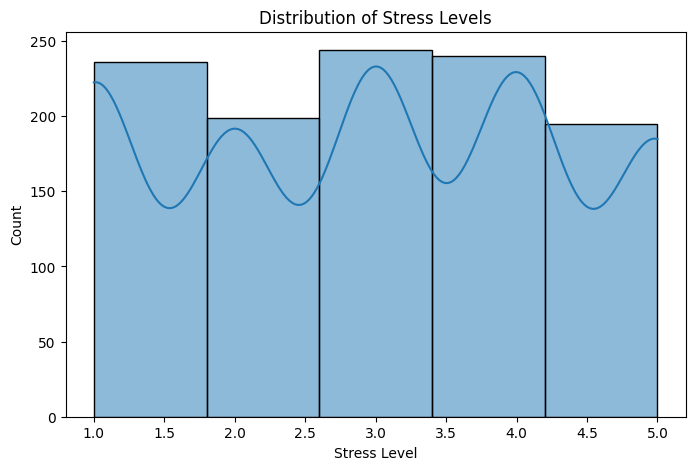

In [ ]:
# Histogram of Stress Levels
plt.figure(figsize=(8,5))
sns.histplot(df["Stress Level"], bins=5, kde=True)
plt.title("Distribution of Stress Levels")
plt.show()

In [ ]:
df.drop(columns=["Personalized Insights Interest"], inplace=True)

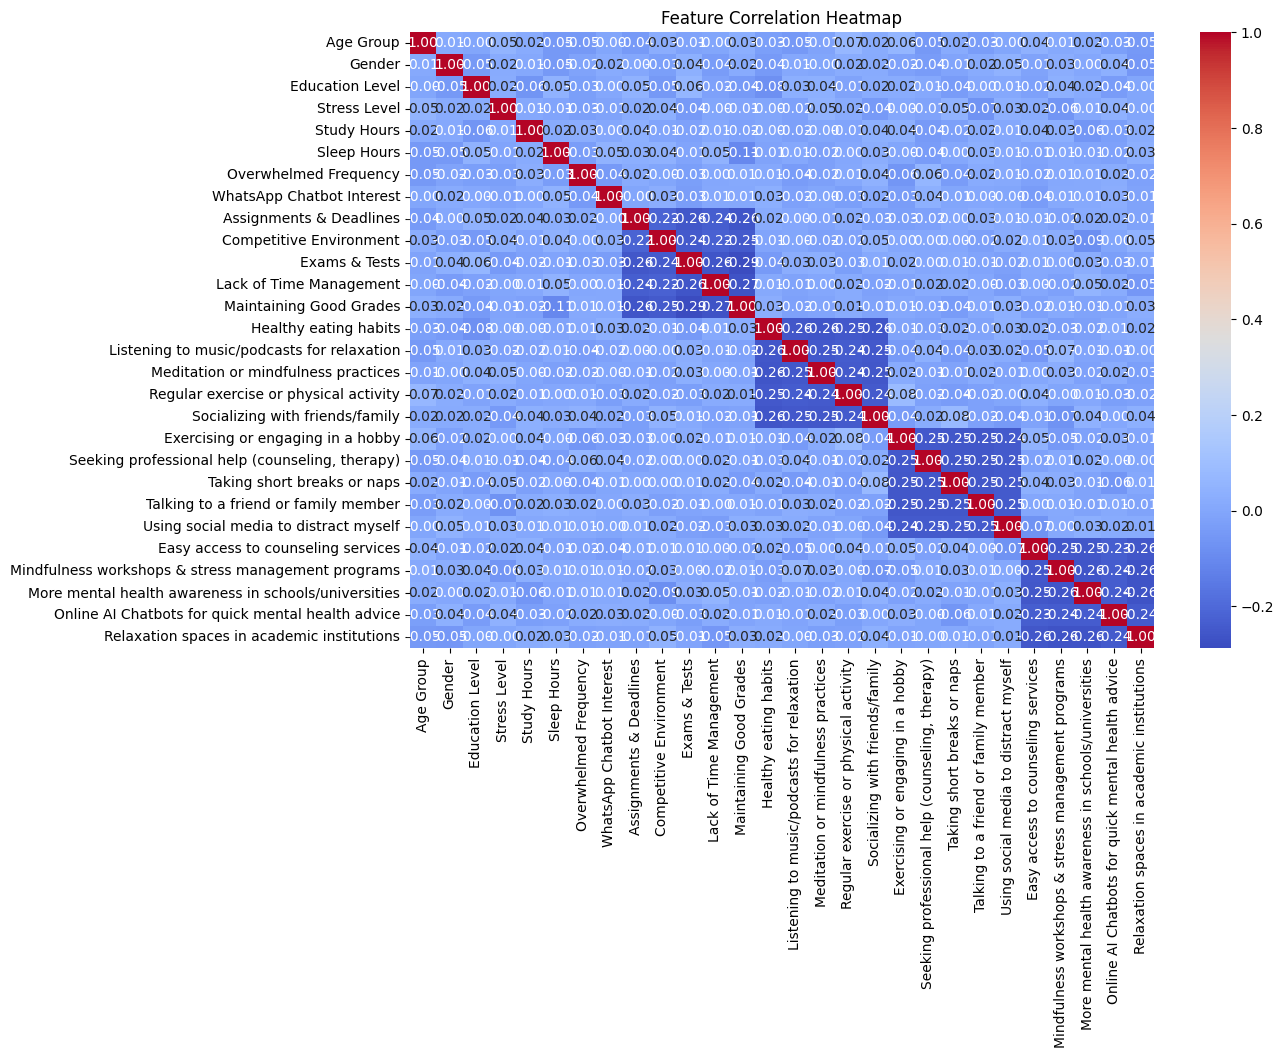

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print(df.info())  # Check if all columns are numeric and no NaNs exist


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age Group                                             1114 non-null   float64
 1   Gender                                                1114 non-null   float64
 2   Education Level                                       1114 non-null   int8   
 3   Stress Level                                          1114 non-null   float64
 4   Study Hours                                           1114 non-null   float64
 5   Sleep Hours                                           1114 non-null   float64
 6   Overwhelmed Frequency                                 1114 non-null   float64
 7   WhatsApp Chatbot Interest                             1114 non-null   float64
 8   Assignments & Deadlines                               1114

In [ ]:
print(df["Stress Level"].isna().sum())  # Count missing values

0


In [ ]:


# 🚀 Split Data
X = df.drop(columns=["Stress Level"])  # Assuming "Stress Level" is target
y = df["Stress Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🚀 Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

best_models = []
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_score:
        best_score = acc
        best_models = [(name, model)]
    elif acc == best_score:
        best_models.append((name, model))

print("\n✅ Best Models Selected:", best_models)

Random Forest Accuracy: 0.1794
Logistic Regression Accuracy: 0.1614
SVM Accuracy: 0.1883

✅ Best Models Selected: [('SVM', SVC())]


In [ ]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", dict(pd.Series(y).value_counts()))
print("After SMOTE:", dict(pd.Series(y_resampled).value_counts()))

NameError: name 'SMOTE' is not defined

In [ ]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Apply scaling

In [ ]:
# Example: Stress-to-Study Ratio
df["Stress_Study_Ratio"] = df["Stress Level"] / (df["Study Hours"] + 1)

# Example: Coping Effectiveness (Sleep vs Study)
df["Coping_Effectiveness"] = df["Sleep Hours"] / (df["Study Hours"] + 1)

In [ ]:

param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y_resampled)

best_model = grid_search.best_estimator_
print("Best Logistic Regression Model:", best_model)

Best Logistic Regression Model: LogisticRegression(C=1)


In [ ]:


rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_scaled, y_resampled)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

Random Forest Accuracy: 1.0


In [ ]:

# Training Accuracy
train_pred = rf.predict(X_scaled)
train_acc = accuracy_score(y_resampled, train_pred)

# Testing Accuracy
test_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9992
Testing Accuracy: 1.0000


In [ ]:


# Save the model
with open("stress_prediction_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:


# Assuming `scaler` was used for feature scaling during training
joblib.dump(scaler, "scaler.pkl")  # Save the scaler

['scaler.pkl']

In [ ]:
print(df.columns)

Index(['Age Group', 'Gender', 'Education Level', 'Stress Level', 'Study Hours',
       'Sleep Hours', 'Overwhelmed Frequency', 'WhatsApp Chatbot Interest', '',
       'Assignments & Deadlines', 'Competitive Environment', 'Exams & Tests',
       'Lack of Time Management', 'Maintaining Good Grades', '',
       'Healthy eating habits', 'Listening to music/podcasts for relaxation',
       'Meditation or mindfulness practices',
       'Regular exercise or physical activity',
       'Socializing with friends/family', '',
       'Exercising or engaging in a hobby',
       'Seeking professional help (counseling, therapy)',
       'Taking short breaks or naps', 'Talking to a friend or family member',
       'Using social media to distract myself', '',
       'Easy access to counseling services',
       'Mindfulness workshops & stress management programs',
       'More mental health awareness in schools/universities',
       'Online AI Chatbots for quick mental health advice',
       'Relaxation

In [ ]:


# Load dataset
df = pd.read_csv("cleaned_data.csv")  # Ensure correct path
df["Stress Level"].fillna(df["Stress Level"].median(), inplace=True)  # Replace NaN with median stress level
# Encode categorical features
age_mapping = {"16-18": 0, "19-21": 1, "22-25": 2, "26+": 3}
overwhelmed_mapping = {"Rarely": 0, "Sometimes": 1, "Often": 2, "Always": 3}

df["Age Group"] = df["Age Group"].map(age_mapping)
df["Overwhelmed Frequency"] = df["Overwhelmed Frequency"].map(overwhelmed_mapping)

# Select Features & Target
X_train = df[["Age Group", "Study Hours", "Sleep Hours", "Overwhelmed Frequency"]]
y_train = df["Stress Level"]

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Save Model & Scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "stress_prediction_model.pkl")

C:\Users\garvi\AppData\Local\Temp\ipykernel_32168\4271702896.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stress Level"].fillna(df["Stress Level"].median(), inplace=True)  # Replace NaN with median stress level
c:\Users\garvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\garvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmat

['stress_prediction_model.pkl']